# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [127]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [128]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), df['target'], random_state=0)


In [129]:
# Display first 5 rows
X_train.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


In [130]:
X_test.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [131]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')
print(30*"-")
print(f'y_train balance: {np.sum(y_train)/len(y_train):.2f}')
print(f'y_test balance: {np.sum(y_test)/len(y_test):.2f}')

X_train.shape: (426, 30)
y_train.shape: (426,)
X_test.shape: (143, 30)
y_test.shape: (143,)
------------------------------
y_train balance: 0.63
y_test balance: 0.63


Given the Exploratory Data Analysis (EDA) already performed on the same dataset in a previous mini-project, the results appear to be satisfactory.

We observed a considerable class imbalance, with 63% of the data belonging to class '1' (benign).

Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [132]:
# Create a Decision Tree model
clf = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, random_state=0)
_ = clf.fit(X_train, y_train)

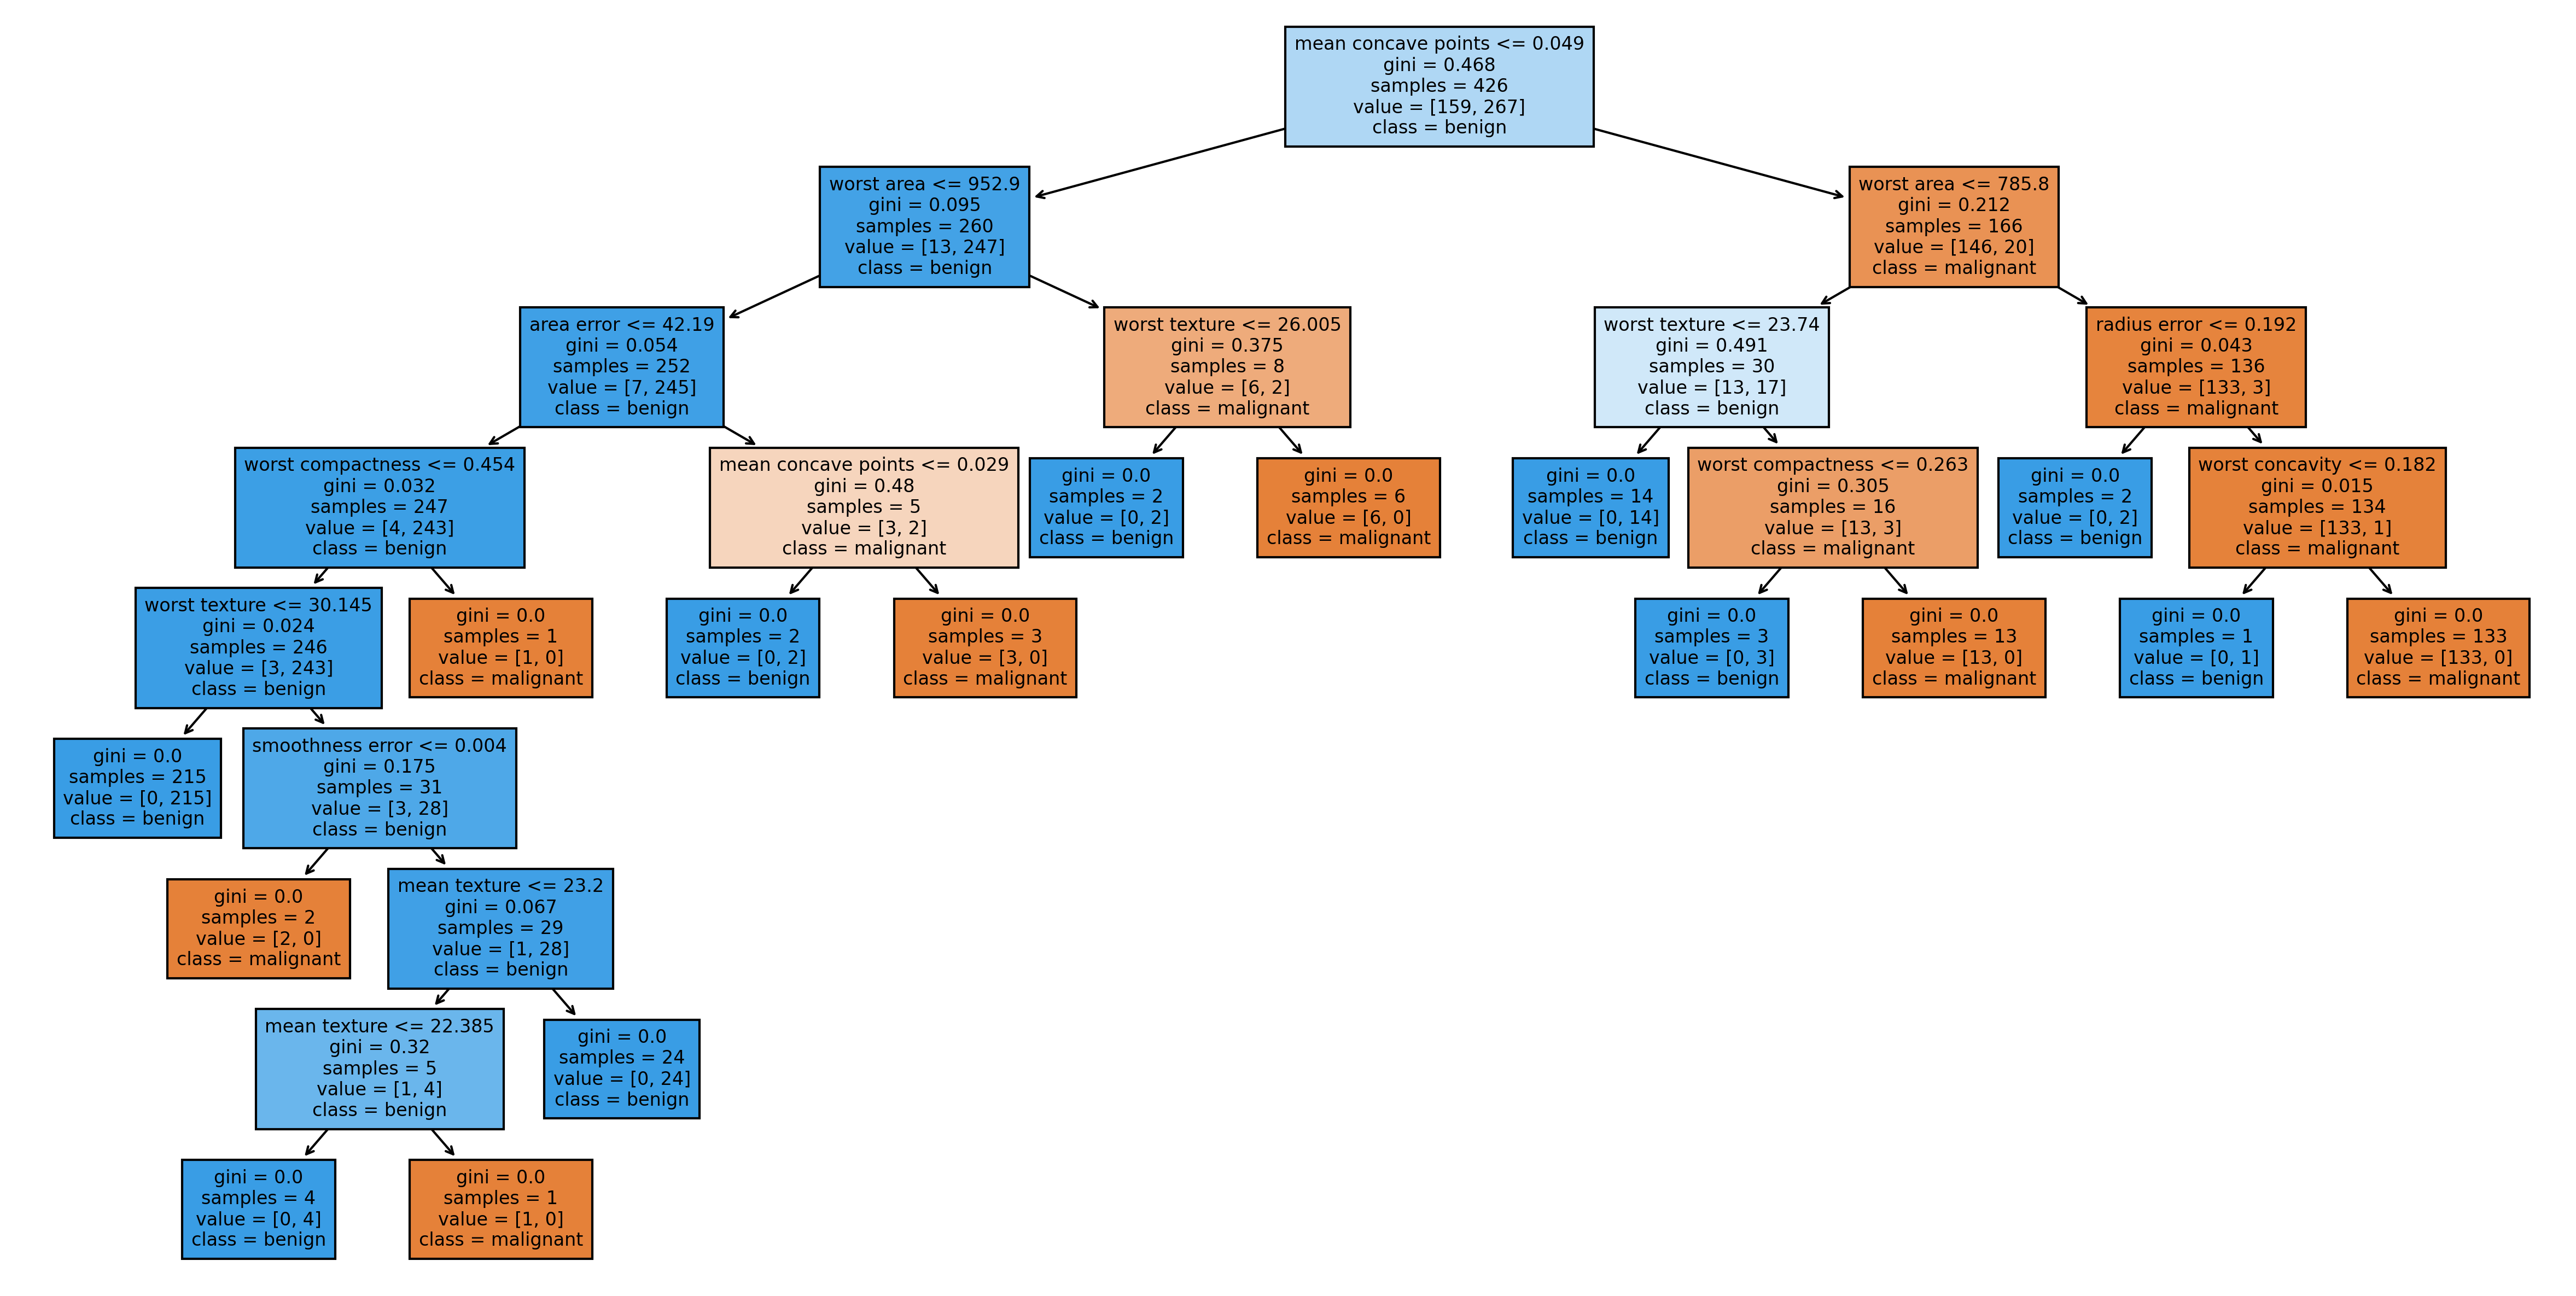

In [133]:
# Visualize the Decision Tree

# feature name
fn = df.columns[:-1]

# class name
cn = data.target_names

# Turn off interactive mode to suppress unnecessary logs
with plt.ioff():
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=300)
    plot_tree(clf, feature_names=fn, class_names=cn, filled=True, fontsize=8)
    plt.show()

We observe that the resulting tree guides us through a series of decisions based on feature values. Each decision progressively narrows down the possibilities until a final classification is reached at a leaf node.

The Gini index at each node indicates the purity of the node, with a lower Gini index signifying greater certainty in the prediction. It's important to note that every leaf node in this tree reaches a Gini index of 0.0, meaning that the training set was perfectly classified (training set accuracy: 100%). However, this perfect classification may indicate overfitting, as the model may not generalize well to unseen data. Therefore, we will now calculate the accuracy for the test set.

In [134]:
clf.score(X_test, y_test)


0.8811188811188811

We achieved a fairly decent accuracy of 88% with the test set.

Next, we will iterate the process and observe how changing the maximum depth (using the max_depth argument) impacts the number of leaf nodes.

First, here are the number of leaf nodes and the depth of the previously displayed tree:

In [135]:
print(f'Number of node leaves: {clf.get_n_leaves()}')
print(f'Depth:  {clf.get_depth()}')


Number of node leaves: 16
Depth:  8


Folowing we will experiment with different max_depth values to observe how the depth of the decision tree affects:
- The complexity of the tree (as measured by the number of leaf nodes).
- The model's accuracy on the test set.



In [136]:
depths = range(3,9)
trees = []
nb_of_leaves = []
scores = []

for i in depths:
  # instance the DTC
  dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=i, random_state=0)
  trees.append(dtc)

  # fit the DTC and add the number of leave nodes in the list
  dtc.fit(X_train, y_train)
  nb_of_leaves.append(dtc.get_n_leaves())

  # calculate the score with the test set and store it in the list
  scores.append(dtc.score(X_test, y_test))


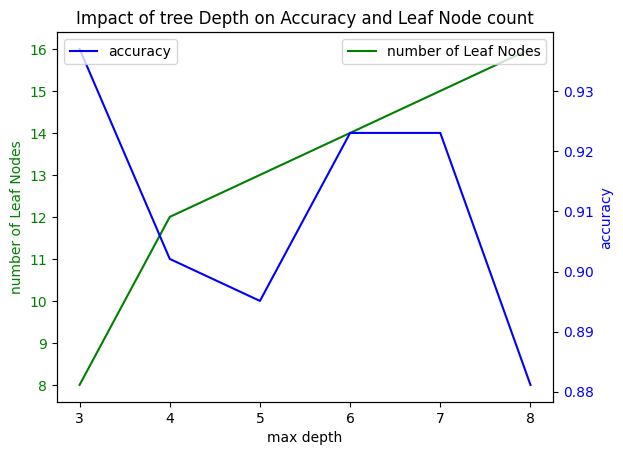

In [137]:
fig, ax1 = plt.subplots()

ax1.plot(depths,nb_of_leaves, 'g-', label="number of Leaf Nodes")
ax1.set_xlabel('max depth')
ax1.set_ylabel('number of Leaf Nodes', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(depths,scores, 'b-', label="accuracy")
ax2.set_ylabel('accuracy', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title("Impact of tree Depth on Accuracy and Leaf Node count")
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

plt.show()

As expected, the number of leaf nodes increases with the tree's maximum depth. However, we surprisingly observed that the model achieves better accuracy on the test set with a lower depth.

In conclusion, the model with a max_depth of 3 is simpler and likely generalizes better to the test data. In contrast, models with higher max_depth values are more complex and may be overfitting the training data, resulting in poorer performance on the test set.

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [138]:
# Train random forest model
rfc = RandomForestClassifier(n_estimators=100, random_state = 0)
_ = rfc.fit(X_train, y_train)

In [139]:
# Extract feature importances
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})


In [140]:
# Print feature importance
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
22,worst perimeter,0.160
27,worst concave points,0.117
20,worst radius,0.117
7,mean concave points,0.103
23,worst area,0.063
6,mean concavity,0.055
2,mean perimeter,0.054
3,mean area,0.049
26,worst concavity,0.039
13,area error,0.034


The feature 'worst perimeter' contributes the most to reducing impurity across all the trees in the Random Forest.

In [141]:
rfc.score(X_test, y_test)

0.972027972027972

By applying a Random Forest with 100 estimators to the same training set, we achieved a higher accuracy of 97.2%.

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [142]:
# Build and train an AdaBoostClassifier on your training data.
dtc = DecisionTreeClassifier(max_depth=1, random_state=0)
abc = AdaBoostClassifier(estimator=dtc, n_estimators=100, random_state=0)
_ = abc.fit(X_train, y_train)


In [143]:
# Evaluate models

# 1st: Decision Tree
clf_predictions = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predictions)
print(f'Decision Tree accuracy:\t{clf_accuracy*100:.2f} %')

# 2nd: Random Forest
rfc_predictions = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
print(f'Random Forest accuracy:\t{rfc_accuracy*100:.2f} %')

# 3rd: AdaBoost
abc_predictions = abc.predict(X_test)
abc_accuracy = accuracy_score(y_test, abc_predictions)
print(f'AdaBoost accuracy:\t{abc_accuracy*100:.2f} %')



Decision Tree accuracy:	88.11 %
Random Forest accuracy:	97.20 %
AdaBoost accuracy:	98.60 %


In summary, AdaBoost is the best-performing model in this scenario, making it the most suitable choice for this particular classification task based on accuracy.


Finally, we will experiment with varying the values of the hyperparameters max_depth to examine how the depth of the decision tree influences the accuracy of the models on the test set.

In [144]:
depths = range(1,9)
dtc_scores = []
rfc_scores = []
abc_scores = []

for i in depths:

  # Decision Tree
  dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=i, random_state=0)
  dtc.fit(X_train, y_train)
  dtc_scores.append(dtc.score(X_test, y_test))

  # Random Forest
  rfc = RandomForestClassifier(n_estimators=100, max_depth=i, random_state = 0)
  rfc.fit(X_train, y_train)
  rfc_scores.append(rfc.score(X_test, y_test))

  # AdaBoost
  abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=i, random_state=0),
                         n_estimators=100, random_state=0)
  abc.fit(X_train, y_train)
  abc_scores.append(abc.score(X_test, y_test))


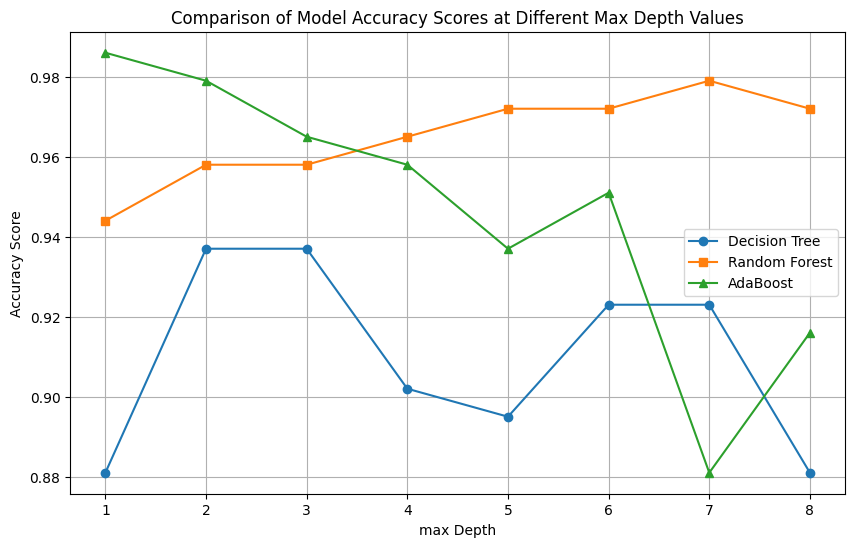

In [145]:
# Plotting the scores by model
plt.figure(figsize=(10, 6))

plt.plot(depths, dtc_scores,  'o-', label='Decision Tree')
plt.plot(depths, rfc_scores, 's-', label='Random Forest')
plt.plot(depths, abc_scores, '^-', label='AdaBoost')

plt.xlabel('max Depth')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores at Different Max Depth Values')
plt.legend()
plt.grid(True)

plt.show()

Overall, AdaBoost is most effective at lower depths, providing the highest accuracy initially, though it shows some decline as depth increases. Random Forest offers consistently high accuracy across all depths, with slight improvements as depth increases. The Decision Tree Classifier has the lowest accuracy, highlighting the advantages of ensemble methods like AdaBoost and Random Forest in achieving better performance.